In [93]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
# df = pd.read_csv("/Users/guanlizhe/Desktop/nccu/NLP/body_shaming/all_label.csv", index_col=[0],low_memory=False)
df_rs = pd.read_csv("/Users/guanlizhe/Desktop/nccu/NLP/body_shaming/random_df.csv", index_col=[0],low_memory=False)

In [128]:
# df[['tag_num', 'content', 'similar_animal', 'similar_object', 'body', 'direct_adj', 'verb', 'slur', 'sex', 'lgbt', 'status', 'label_ver2']]

## 把資料分成8:2的訓練集和測試集

In [118]:
from sklearn.model_selection import train_test_split

all_features = df_rs[['tag_num', 'similar_animal', 'similar_object', 'body', 'direct_adj', 'verb', 'slur', 'sex', 'lgbt', 'status']]
all_labels = df_rs['label_ver2']

feat_train, feat_test, label_train, label_test = train_test_split(all_features, all_labels, train_size=0.8, random_state=50)

# feat_train, feat_test, label_train, label_test = train_test_split(all_features, all_labels, train_size=0.8)


In [119]:
feat_test

,tag_num,similar_animal,similar_object,body,direct_adj,verb,slur,sex,lgbt,status
6051,2,0,0,0,0,0,0,0,0,0
4437,2,0,0,0,0,0,1,0,0,0
8705,2,0,0,0,0,0,0,0,0,0
753,2,0,0,0,0,0,0,0,0,0
2366,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10354,2,0,0,0,0,0,1,1,0,0
3256,1,0,0,0,0,0,0,0,0,0
2736,0,0,0,0,0,0,0,0,0,0
3596,2,1,0,1,0,0,0,0,0,0


## naive bayes model

In [120]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(feat_train, label_train) 

MultinomialNB()

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

predicted_nb = nb_model.predict(feat_test)
bayes_accuracy = accuracy_score(label_test, predicted_nb)
bayes_fscore = f1_score(label_test, predicted_nb, average='micro') 

print(bayes_accuracy)
print(bayes_fscore)

0.771280276816609
0.7712802768166089


In [112]:
report_nb = classification_report(label_test, predicted_nb)
print(report_nb)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1550
           1       0.74      0.73      0.74      1147
           2       0.57      0.12      0.20       178
           3       0.00      0.00      0.00        15

    accuracy                           0.76      2890
   macro avg       0.52      0.43      0.44      2890
weighted avg       0.75      0.76      0.74      2890



## Decision Tree

In [122]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(feat_train, label_train)

DecisionTreeClassifier()

In [123]:
predicted_dt = dt_model.predict(feat_test)
dt_accuracy = accuracy_score(label_test, predicted_dt)
dt_fscore = f1_score(label_test, predicted_dt, average='micro') 

print(dt_accuracy)
print(dt_fscore)

0.8730103806228374
0.8730103806228374


In [115]:
report_dt = classification_report(label_test, predicted_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1550
           1       0.78      0.98      0.87      1147
           2       0.61      0.32      0.42       178
           3       0.00      0.00      0.00        15

    accuracy                           0.86      2890
   macro avg       0.59      0.53      0.55      2890
weighted avg       0.86      0.86      0.85      2890



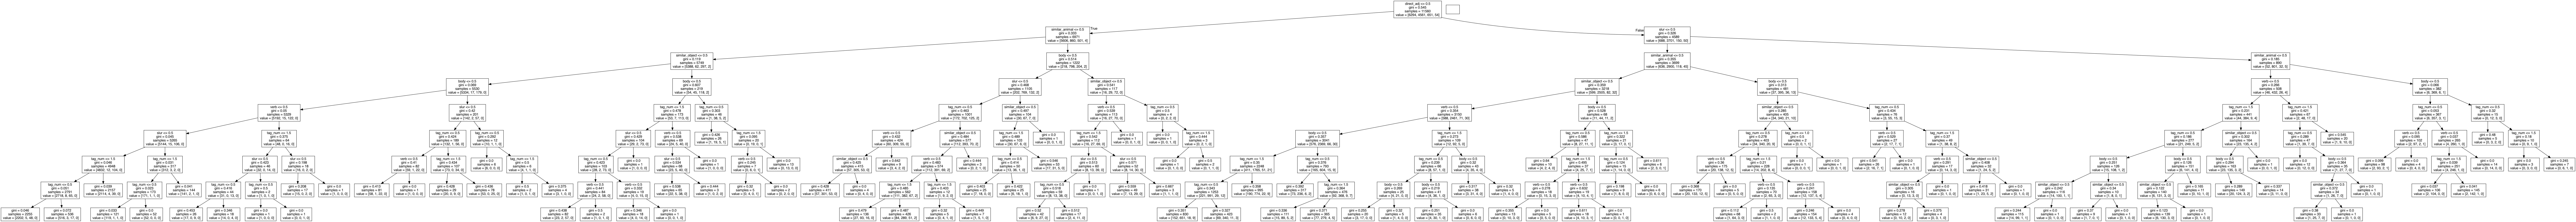

In [103]:
from IPython.display import Image
import pydot
tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=list(all_features))
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(graph.create_png()) 

## SVM

In [137]:
from sklearn import svm

svm_model = svm.SVC(kernel='poly', C=1)
svm_model.fit(feat_train, label_train)

SVC(C=1, kernel='poly')

In [138]:
predicted_svm = svm_model.predict(feat_test)
svm_accuracy = accuracy_score(label_test, predicted_svm)
svm_fscore = f1_score(label_test, predicted_svm, average='micro') 

print(svm_accuracy)
print(svm_fscore)

0.8750865051903114
0.8750865051903114


In [18]:
report_svm = classification_report(label_test, predicted_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1545
           1       0.79      0.99      0.88      1174
           2       0.62      0.19      0.29       157
           3       0.00      0.00      0.00        14

    accuracy                           0.87      2890
   macro avg       0.59      0.51      0.52      2890
weighted avg       0.87      0.87      0.86      2890

